<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/PWM_SineTriangle_SinglePhase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Pulse Width Modulation - Sine Triangle</h1></b>

Dr. Bingsen Wang

11/8/2024
</center>

#Python Code
The Python code illustrates the basic PWM.  

0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
0


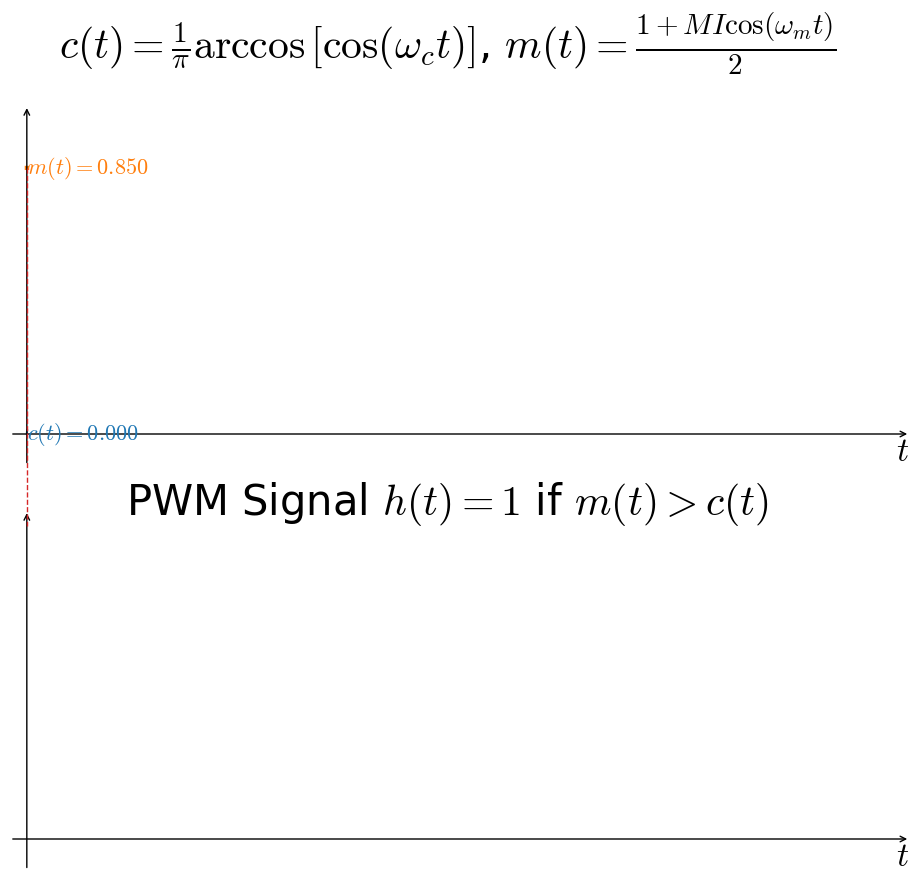

In [83]:
import matplotlib as mpl
from os import linesep
from numpy import linspace,cos,pi,sin,random,arccos,heaviside,array
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib import animation,rc,cm
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

#functions
def carr(f,t): #carrier
  return 1/pi*arccos(cos(2*pi*f*t))

def m(MI,f,theta,t): #modulation function
  return (MI*cos(2*pi*f*t + theta) + 1)/2

def h(ct,mt): #PWM switching function
  return heaviside(mt-ct,0)


#parameters
fc = 18 # carrier frequency
fm = 1 # signal
MI = 0.7 # modulation index
theta = 0

#time series
t=linspace(0,1/fm,3000)
step=2
Nf = len(t)//step
ct = carr(fc,t) #carrier time-domain signal
mt = m(MI,fm,0,t) #modulation function time series
ht = h(ct,mt) #pwm signal time series
clst = list(cm.tab10.colors) #colors of lines

fig = plt.figure(figsize=(9,9))
ax_frame = [[[0, 0.45, 1, .4], [-.02,1.05], [-.1,1.05]], #sine & triangle
            [[0, 0,   1, .4], [-.02,1.05], [-.1,1.05]], # pwm
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lst,lines,txts = [],[],[]
for k in range(len(ax_frame)):
  xnm,ynm = ax_frame[k][1:]
  ax=fig.add_axes(ax_frame[k][0],xlim=xnm, ylim=ynm,fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xnm[1], 0), (xnm[0], 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ynm[1]), (0,ynm[0]),arrowprops={'arrowstyle':"->"}) #y-axis
  lines.append(ax.plot([], [], c=clst[2*k], lw=1.5)[0])
  lines.append(ax.plot([], [], c=clst[2*k+1], lw=3)[0])
  txts.append(ax.text(0,0,'',size=16,va='center',color=clst[2*k]))
  txts.append(ax.text(0,0,'',size=16,va='center',color=clst[2*k+1]))
  ax.text(xnm[1],0,' $t$',size=24,va='top',ha='right') #x-axis label
ax_lst[0].text(0.5,1.25,r'$c(t)=\frac{1}{\pi}\arccos\left[\cos(\omega_c t)\right]$, $m(t)=\frac{1+MI\cos(\omega_m t)}{2}$',va='center',ha='center',size=30)
ax_lst[1].text(0.5,1.15,r'PWM Signal $h(t)=1$ if $m(t)>c(t)$',va='top',ha='center',size=30)

line2ax = mpl.lines.Line2D([],[],transform=fig.transFigure,ls='--',c=clst[3], lw=1)
fig.lines.append(line2ax)
# animation function. This is called sequentially
def animate(i):
  if i%100==0: print(i)
  txts[0].set_text(rf'$c(t)={ct[i*step]:.3f}$')
  txts[0].set_position((t[i*step],ct[i*step]))
  txts[1].set_text(rf'$m(t)={mt[i*step]:.3f}$')
  txts[1].set_position((t[i*step],mt[i*step]))
  lines[0].set_data(t[:(i+1)*step],ct[:(i+1)*step])
  # lines[0].set_data(t,ct)
  # lines[1].set_data(t,mt)
  lines[1].set_data(t[:(i+1)*step],mt[:(i+1)*step])
  lines[3].set_data(t[:(i+1)*step],ht[:(i+1)*step])
  transFigure = fig.transFigure.inverted()
  p1 = transFigure.transform(ax_lst[0].transData.transform([t[i*step],max(ct[i*step],mt[i*step])]))
  p2 = transFigure.transform(ax_lst[1].transData.transform([t[i*step],ht[i*step]]))
  line2ax.set_data([p1[0],p2[0]],[p1[1],p2[1]])
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"PWM_sineTriangle_SinglePhase.mp4"
writervideo = animation.FFMpegWriter(fps=50)
anim.save(fn, writer=writervideo,dpi = 200)